In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import all the necesry libraries and the data frame

In [2]:
df=pd.read_csv(r"C:\Users\Lenovo\Documents\פייתון תרגולים\mini_project_1\laptop_price - dataset.csv")
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


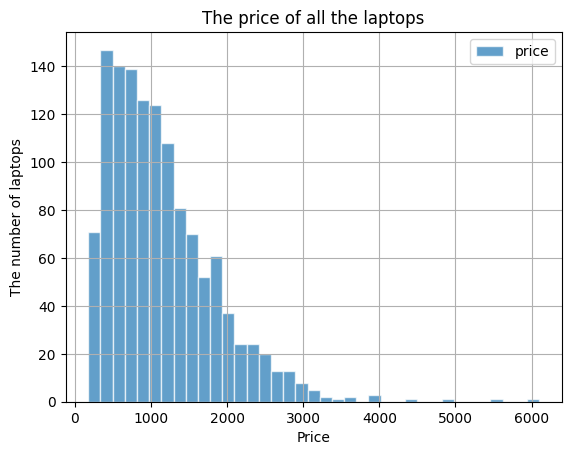

In [ ]:
plt.hist(df["Price (Euro)"], bins='auto', alpha=0.7, label='price', edgecolor="white")
#create a historama
plt.xlabel('Price') 
plt.ylabel('The number of laptops')
#naming the axes
plt.legend() #create the legend
plt.title('The price of all the laptops')
plt.show()

In [ ]:
mean_price=df.groupby('GPU_Company')['Price (Euro)'].mean() #finding the mean of each company
print(mean_price) #The mean prices of the company
most_exp_p=mean_price.max() #finding the company that has on average the most expensive laptop
most_exp_n=mean_price.idxmax() #finding the name of the company 
print(f"The company that has on average the most expensive laptop is {most_exp_n} and the average is {most_exp_p}")

GPU_Company
AMD        778.026552
ARM        659.000000
Intel     1020.367713
Nvidia    1496.745101
Name: Price (Euro), dtype: float64
The company that has on average the most expensive laptop is Nvidia and the average is 1496.745101010101


In [8]:
opsys_name=df["OpSys"].unique() 
print(opsys_name)

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [ ]:
opsys_map={"Mac OS X":'macOS','Windows 10 S':'Windows 10' } # if Windows 7 and 10 are diffrent 
df["uniform_OpSys"]= df["OpSys"].replace(opsys_map)
df["uniform_OpSys"].unique() # finding the unique value

array(['macOS', 'No OS', 'Windows 10', 'Linux', 'Android', 'Chrome OS',
       'Windows 7'], dtype=object)

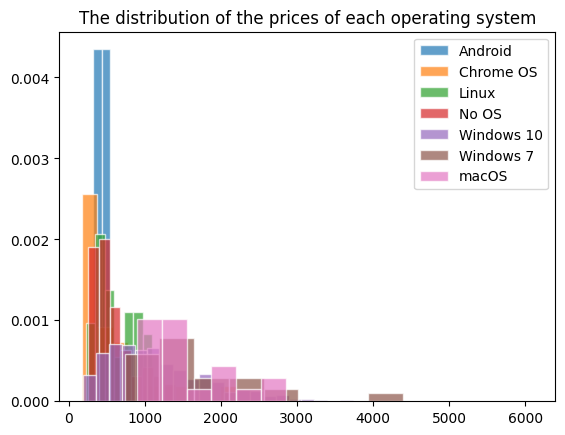

In [ ]:
group_opsys=df.groupby("uniform_OpSys") #group by the opsys
for opsys, group in group_opsys: # takes every opsys and it's data to creat each plot 
    plt.hist(group["Price (Euro)"], bins='auto', alpha=0.7, label=opsys, edgecolor="white", density=True) #creat histograma of the prices by using denstiy
plt.legend() #create the legend
plt.title('The distribution of the prices of each operating system')
plt.show()
